## Connect to DB

In [1]:
import os
import psycopg2

conn = psycopg2.connect(host='localhost', port=5432, dbname='ANTT', user=os.environ["PGDBUSER"], password=os.environ["PGDBPASSWORD"])
cur = conn.cursor()

## Company counts

In [2]:
query = """
    SELECT 
        cnpj, COUNT(1) as totalTrips
    FROM
        regulartrips
    GROUP BY
        cnpj
"""
cur.execute(query)

In [3]:
result = cur.fetchall()

In [4]:
import numpy as np

totalCompanies = len(result)
tripCounts = [entry[1] for entry in result]
tripCounts = np.asarray(tripCounts)

In [5]:
print(totalCompanies)

213


## Trips per company

In [6]:
import pandas as pd

tripCountsDF = pd.DataFrame(tripCounts)
tripCountsDF.describe()

,0
count,213.000000
mean,32579.727700
std,69051.299984
min,11.000000
25%,1428.000000
50%,7769.000000
75%,26295.000000
max,398934.000000


[]

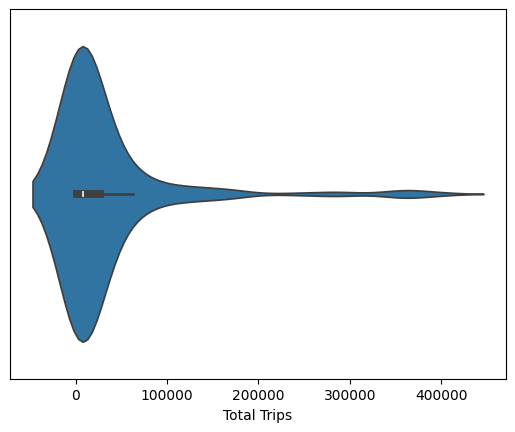

In [7]:
import seaborn as sns

boxplot = sns.violinplot(tripCountsDF, orient='h')
boxplot.set_xlabel("Total Trips")
boxplot.set_yticks([])

# Top 10 Companies

In [8]:
def GetTopKCountsQuery(k, tableName, countStatement):
    query = f"""
        WITH counts AS (
            SELECT 
                cnpj, COUNT({countStatement}) as c
            FROM
                {tableName}
            GROUP BY
                cnpj
            ORDER BY 
                c DESC
            LIMIT
                {k}
        )
        SELECT
            info.name, counts.c
        FROM
            counts 
        INNER JOIN 
            companyinfo as info
        ON
            counts.cnpj = info.cnpj
        ORDER BY
            counts.c DESC;
    """

    return query

In [9]:
limit = 10

query = GetTopKCountsQuery(limit, 'regulartrips', '1')
cur.execute(query)
results = cur.fetchall()

In [10]:
top10DF = pd.DataFrame(results, columns=["Company Name", "Total Bus Trips"])
top10DF.describe()

,Total Bus Trips
count,10.000000
mean,300553.100000
std,81613.225992
min,170269.000000
25%,255294.750000
50%,319129.500000
75%,363285.000000
max,398934.000000


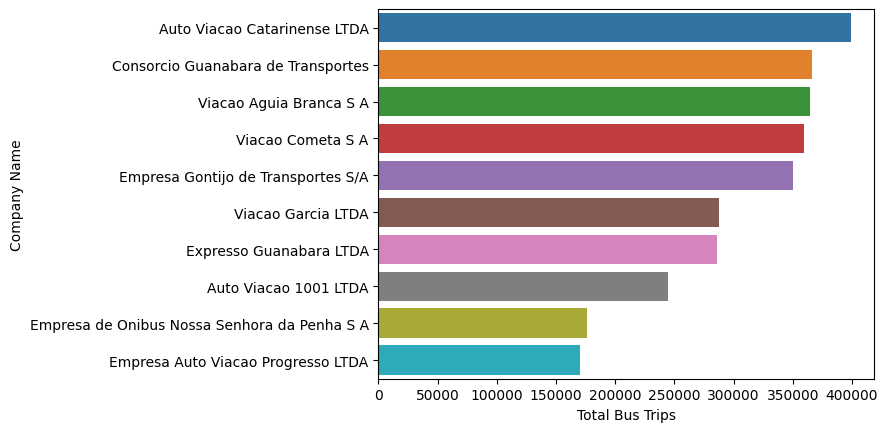

In [11]:
import seaborn as sns

barplot = sns.barplot(top10DF, x="Total Bus Trips", y="Company Name", hue="Company Name")

# Distinct lines per company

In [12]:
query = """
    SELECT 
        cnpj as cnpj, COUNT(DISTINCT line) as totalLines
    FROM
        regulartrips
    GROUP BY
        cnpj
"""
cur.execute(query)

In [13]:
result = cur.fetchall()

In [14]:
import pandas as pd

lineCountDF = pd.DataFrame(result)
lineCountDF.describe()

,1
count,213.000000
mean,31.572770
std,62.095564
min,1.000000
25%,4.000000
50%,8.000000
75%,26.000000
max,448.000000


[]

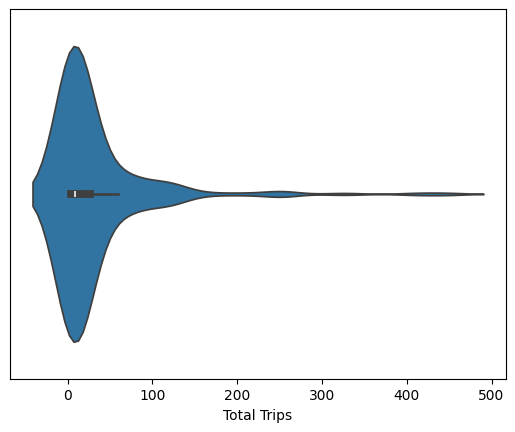

In [15]:
import seaborn as sns

boxplot = sns.violinplot(lineCountDF, orient='h')
boxplot.set_xlabel("Total Trips")
boxplot.set_yticks([])

## Top 10 companies

In [16]:
limit = 10
query = GetTopKCountsQuery(limit, 'regulartrips', 'DISTINCT line')
cur.execute(query)
results = cur.fetchall()

In [17]:
import pandas as pd

totalLinesDF = pd.DataFrame(results, columns=["Company Name", "Total Lines"])
totalLinesDF.describe()

,Total Lines
count,10.000000
mean,257.300000
std,109.803916
min,128.000000
25%,176.500000
50%,250.500000
75%,307.500000
max,448.000000


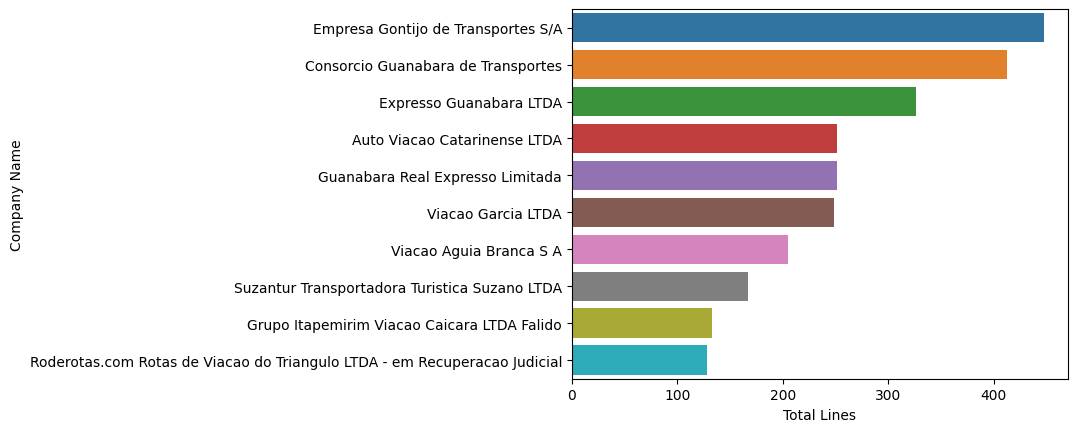

In [18]:
import seaborn as sns

barplot = sns.barplot(totalLinesDF, x="Total Lines", y="Company Name", hue="Company Name")

## Number of vehicles per company

In [19]:
query = """
    SELECT 
        cnpj as cnpj, COUNT(DISTINCT plate) as totalVehicles
    FROM
        regulartrips
    GROUP BY
        cnpj
"""
cur.execute(query)

In [20]:
result = cur.fetchall()

In [21]:
import pandas as pd

lineCountDF = pd.DataFrame(result)
lineCountDF.describe()

,1
count,213.000000
mean,160.446009
std,304.313801
min,2.000000
25%,15.000000
50%,34.000000
75%,164.000000
max,1916.000000


[]

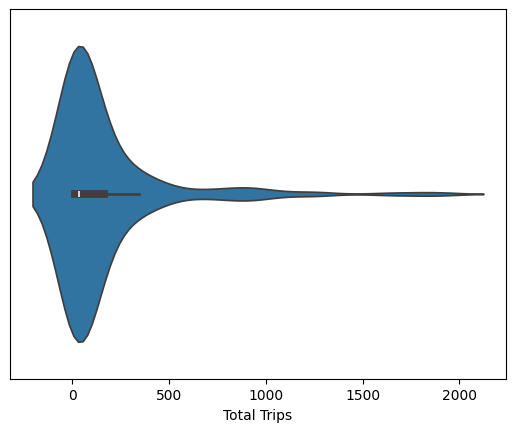

In [22]:
import seaborn as sns

boxplot = sns.violinplot(lineCountDF, orient='h')
boxplot.set_xlabel("Total Trips")
boxplot.set_yticks([])

## Top 10 companies

In [23]:
limit = 10

query = GetTopKCountsQuery(limit, 'regulartrips', 'DISTINCT plate')
cur.execute(query)
results = cur.fetchall()

In [25]:
vehicleCountDF = pd.DataFrame(results, columns=["Company Name", "Total Vehicles"])
vehicleCountDF.describe()

,Total Vehicles
count,10.000000
mean,1265.600000
std,384.327754
min,889.000000
25%,970.000000
50%,1149.000000
75%,1544.500000
max,1916.000000


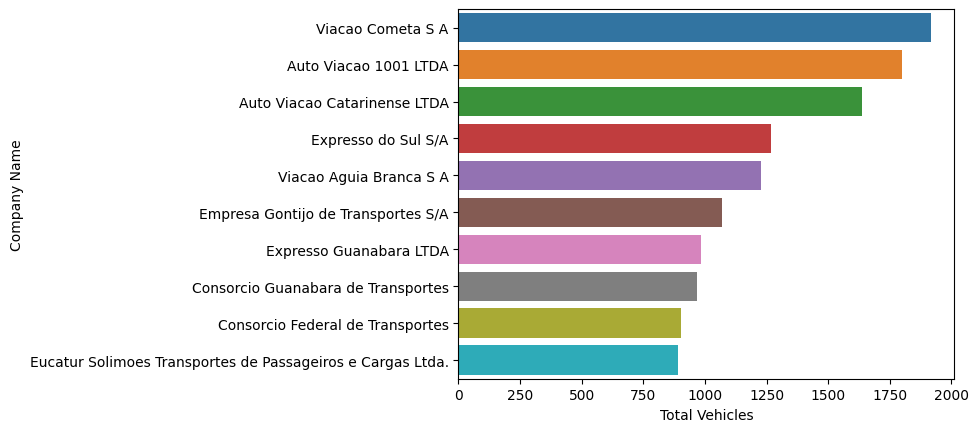

In [27]:
barplot = sns.barplot(vehicleCountDF, x="Total Vehicles", y="Company Name", hue="Company Name")